%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


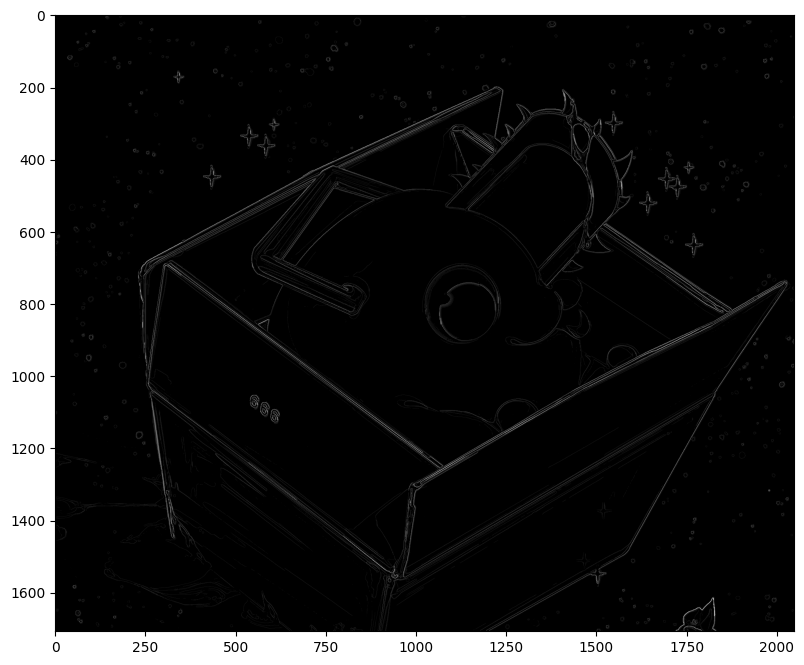

In [2]:
import numpy as np
import cv2
%pylab inline
import matplotlib.pyplot as plt

def Canny_detector(img,weak_th=100,strong_th=150):
    # Convert image to grayscale
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Noise reduction (using Gaussian)
    img = cv2.GaussianBlur(img,(5,5),1.4)
    
    # Calculating the gradients (using Sobel)
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0,3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1,3)

    mag, ang = cv2.cartToPolar(gx, gy,angleInDegrees=True)
    height,width = img.shape
    
    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang - 180) if abs(grad_ang) > 180 else abs(grad_ang)
            
            #selecting the neigbours of the target pixel according to the gradient direction
            if grad_ang <= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x+1, i_y
            elif 22.5 < grad_ang and grad_ang <= (22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x+1, i_y+1
            elif (22.5 + 45) < grad_ang and grad_ang <= (22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y+1
            elif (22.5 + 90) < grad_ang and grad_ang <= (22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y+1
                neighb_2_x, neighb_2_y = i_x+1, i_y-1
            
            #Non-maximum supression step
            if width > neighb_1_x >= 0 and height > neighb_1_y >= 0:
                if mag[i_y, i_x] < mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x] = 0
                    continue

            if width > neighb_2_x >= 0 and height > neighb_2_y >= 0:
                if mag[i_y, i_x] < mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x] = 0

    # Apply double thresholding + hysteresis
    ids = np.zeros_like(img)
    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y,i_x]
            if grad_mag < weak_th:
                mag[i_y,i_x] = 0
            elif strong_th > grad_mag >= weak_th:
                ids[i_y,i_x] = 1
            else:
                ids[i_y,i_x] = 2
                
    return mag

image_path = './1259119.jpg'
img = plt.imread(image_path)
canny_img = Canny_detector(img, 30, 50)
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(canny_img, cmap='gray')
plt.show()